In [7]:
#Dùng pipeline 2
#Data->Standardization->Normalization->Model
import pandas as pd
# Đường dẫn đến tệp CSV
file_path = 'dulieuxettuyendaihoc.csv'
# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path)
# Hiển thị một số dòng đầu của DataFrame
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df=df[['T4','T5','T6','NGONNGU']]
X=df[['T4','T5','T6']].values
y=df[['NGONNGU']].values
# mức 20% random=16
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=16)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #z-score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import numpy as np
steps=[('standard',StandardScaler()),('model',LinearRegression())]

In [10]:
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('standard', StandardScaler()), ('model', LinearRegression())])

In [12]:
model=pipe.fit(X_train,y_train)

In [13]:
#Sinh viên tự đánh giá mô hình thông qua: score, MAE, RMSE và MAPE
y_test_pred=pipe.predict(X_test)
y_test_pred

array([[3.62577162],
       [4.29761949],
       [3.5083291 ],
       [3.23874158],
       [3.5360304 ],
       [3.59047505],
       [4.03371732],
       [3.26715882],
       [3.4305151 ],
       [4.0272979 ],
       [3.73952605],
       [3.65878385],
       [3.60898163],
       [3.43258733],
       [3.67945052],
       [3.62045597],
       [3.50984653],
       [3.57344547],
       [3.83193827],
       [3.8913986 ]])

In [15]:
#tính test
print('Score or R-Squared: ', model.score(X_test,y_test))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_test,y_test_pred))

Score or R-Squared:  -0.11740379827248537
Mean Absolute Error:  1.2166875858117512
Mean Squared Error:  2.0621337908431756
Root Mean Squared Error:  1.4360131583112934
Mean Absolute Percentage Error:  0.38207593730147904


In [16]:
#tính cột train
y_train_pred=model.predict(X_train)
print('Train')
print('Score or R-Squared: ', model.score(X_train,y_train))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_train,y_train_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_train,y_train_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Train
Score or R-Squared:  0.02917137414567572
Mean Absolute Error:  1.1335166308420888
Mean Squared Error:  1.986776132865296
Root Mean Squared Error:  1.4095304653909742
Mean Absolute Percentage Error:  0.3884006459483772


In [17]:
vT4=10.0
vT5=6.0
vT6=7.5

predicted_NN=pipe.predict([[vT4,vT5,vT6]])

print('Giá trị dự báo điểm ngôn ngữ: ',predicted_NN)

Giá trị dự báo điểm ngôn ngữ:  [[2.88534836]]


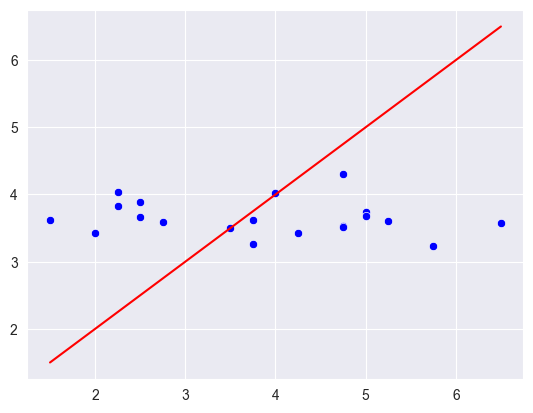

In [18]:
#vẽ Scatter test
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x=y_test.flatten(),y=y_test.flatten(),markers='s',color='r')
sns.scatterplot(x=y_test.flatten(),y=y_test_pred.flatten(),markers='o',color='b')
plt.show()

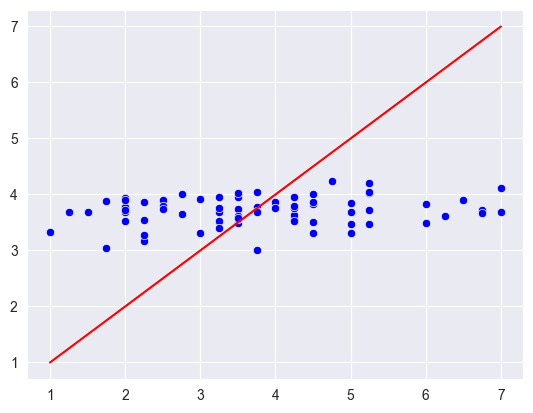

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
y_train_pred=pipe.predict(X_train)
sns.lineplot(x=y_train.flatten(),y=y_train.flatten(),markers='s',color='r')
sns.scatterplot(x=y_train.flatten(),y=y_train_pred.flatten(),markers='o',color='b')
plt.show()